In [1]:
%matplotlib inline

import polars as pl
from matplotlib import pyplot as plt

In [2]:
# variáveis facilitadoras

perm_eth_gender = []
for eth in range(1, 5):
    for g in ["f", "m"]:
        perm_eth_gender.append((eth, g))

expand = {
    1: "African American",
    2: "East Asian",
    3: "Caucasian Latin",
    4: "Asian Indian",
}


In [3]:
dataset_base = "../datasets/base.csv"
df_base = pl.read_csv(dataset_base, sep="\t")
df_base.sample(5).head()


id,name,filepath,ethnicity,ethnicity_name,gender
str,str,str,i64,str,str
"""n003836""","""Jared_Followil...","""/home/lincoln/...",3,"""Caucasian Lati...","""m"""
"""n004738""","""Kevin_Dillon""","""/home/lincoln/...",3,"""Caucasian Lati...","""m"""
"""n000178""","""Alain_Traoré""","""/home/lincoln/...",1,"""African Americ...","""m"""
"""n002715""","""Facundo_Conte""","""/home/lincoln/...",3,"""Caucasian Lati...","""m"""
"""n005513""","""Marc_Rzatkowsk...","""/home/lincoln/...",3,"""Caucasian Lati...","""m"""


In [4]:
totals = (
    df_base.groupby(["ethnicity_name", "gender"])
    .count()
    .sort(by=["ethnicity_name", "gender"])
)
totals = totals.select(
    [pl.col("*"), ((pl.col("count") / totals["count"].sum()) * 100).alias("perc")]
)

totals


ethnicity_name,gender,count,perc
str,str,u32,f64
"""African Americ...","""f""",3671,2.167111
"""African Americ...","""m""",7028,4.148858
"""Asian Indian""","""f""",4728,2.791093
"""Asian Indian""","""m""",4276,2.524263
"""Caucasian Lati...","""f""",46976,27.731469
"""Caucasian Lati...","""m""",83966,49.567876
"""East Asian""","""f""",12269,7.242792
"""East Asian""","""m""",6482,3.826537


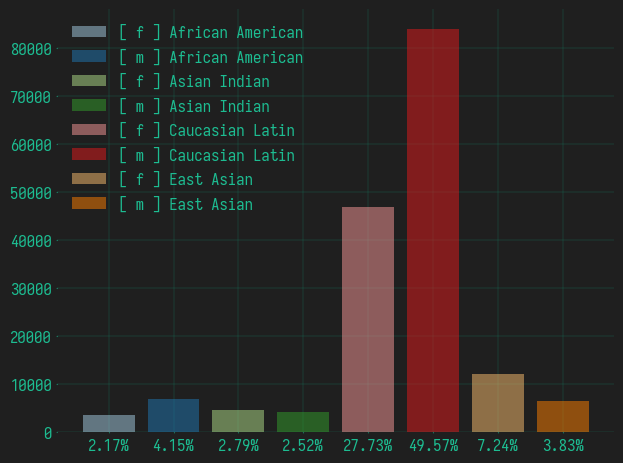

In [5]:
plt.bar(
    list(range(8)),
    totals["count"],
    color=plt.cm.Paired.colors[:8],
    label=[
        f"[ {i} ] {j}" for (i, j) in zip(totals["gender"], totals["ethnicity_name"])
    ],
    alpha=0.5,
)
plt.legend()
plt.xticks(list(range(8)), [f"{i:.2f}%" for i in totals["perc"]]);


In [6]:
ids_frequency = (
    df_base.groupby(["id", "ethnicity", "gender"])
    .count()
    .sort(by=["count"], reverse=True)
)
ids_frequency.head()


id,ethnicity,gender,count
str,i64,str,u32
"""n004563""",4,"""f""",761
"""n001242""",3,"""m""",644
"""n003217""",3,"""m""",641
"""n001878""",3,"""m""",638
"""n008361""",3,"""f""",617


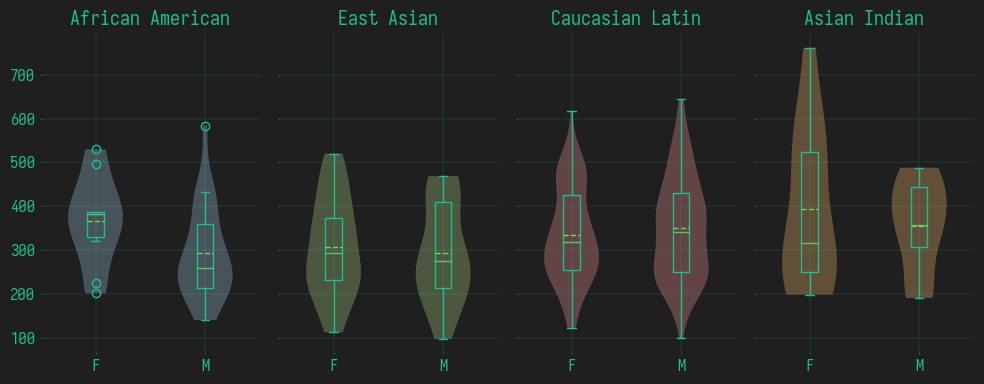

In [7]:
fig, ax = plt.subplots(1, 4, figsize=(10, 4), sharey=True)

for i in range(4):
    dataf = ids_frequency.select(
        [
            pl.col("count").filter(
                (pl.col("ethnicity") == i + 1) & (pl.col("gender").str.contains("f"))
            ),
        ]
    )
    datam = ids_frequency.select(
        [
            pl.col("count").filter(
                (pl.col("ethnicity") == i + 1) & (pl.col("gender").str.contains("m"))
            ),
        ]
    )
    data = [dataf["count"].to_list(), datam["count"].to_list()]
    viol_parts = ax[i].violinplot(
        data, showmeans=False, showmedians=False, showextrema=False
    )
    ax[i].boxplot(data, showfliers=True)
    ax[i].set_title(expand[i + 1])
    ax[i].set_xticklabels(["F", "M"])

    for pc in viol_parts["bodies"]:
        pc.set_facecolor(plt.cm.Paired.colors[i * 2])


In [8]:
dfs = []

for eth, g in perm_eth_gender:
    _freq = ids_frequency.select(
        [
            pl.col("id").filter((pl.col("ethnicity") == eth) & (pl.col("gender") == g)),
            pl.col("count").filter(
                (pl.col("ethnicity") == eth) & (pl.col("gender") == g)
            ),
        ]
    )["count"].describe()
    if len(dfs) == 0:
        dfs.append(_freq.select([pl.col("statistic")]))
    dfs.append(_freq.select([pl.col("value").alias(f"[ {g} ] {expand[eth]}")]))


pl.concat(dfs, how="horizontal")


statistic,[ f ] African American,[ m ] African American,[ f ] East Asian,[ m ] East Asian,[ f ] Caucasian Latin,[ m ] Caucasian Latin,[ f ] Asian Indian,[ m ] Asian Indian
str,f64,f64,f64,f64,f64,f64,f64,f64
"""min""",202.0,141.0,113.0,98.0,123.0,99.0,199.0,191.0
"""max""",530.0,584.0,520.0,469.0,617.0,644.0,761.0,488.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",367.1,292.833333,306.725,294.636364,335.542857,349.858333,394.0,356.333333
"""std""",102.294184,104.63463,111.336171,112.153613,106.969193,116.826538,179.293056,102.751539
"""count""",10.0,24.0,40.0,22.0,140.0,240.0,12.0,12.0
